### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to /Users/shawn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
### Begin Assignment Here
X = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')

In [15]:
X.shape

(813, 2)

In [3]:
X

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [4]:
# select text and label columns only

X = X[['text', 'label']]

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)


In [5]:
# Answer here
for idx, i in enumerate(X.text[:3]):
    print(f'example {idx + 1}:')
    print(i)

example 1:
Calls on retards
example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3:
Seeing lots of red in the ticker.


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
#Answer here

#method 1
X.head(10)[['text', 'label']]

#method 2
X.query('index < 10')

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0
6,Trump will respond to china increasing their t...,-1.0
7,Confirmed not a trap. Its been like this for p...,0.0
8,Am I the only one seeing the cup & handle brea...,1.0
9,HLGN is $10. Hurry and catch it now before it ...,1.0


### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [7]:
# Answer here

# filter by label 1.0 instead

X[X['label'] == 1.0][::10][:5]

,text,label
3,Vision Marine Technologies Inc. is rewriting t...,1.0
78,I think it’s gonna work itself out. I bought t...,1.0
168,The obvious can also be refreshing from CNBC: ...,1.0
219,Same. Back to break even after that last rip b...,1.0
319,Etrade has a feed of news articles about how r...,1.0


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [8]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 0)

,text,label
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [11]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [12]:
sum(X.duplicated())

23

In [13]:
sum(X.duplicated('text'))

23

In [14]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

/var/folders/gd/62m57c3j5js97yy91tl9s4x40000gn/T/ipykernel_30360/3140244869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
# skipped, not relevant for new dataset

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [16]:
X_sample = X.sample(n=200) #random state

In [ ]:
# Answer here

# same explanation as the old dataset

# 1) X_sample is a subset of X that is randomly shuffled and extracted every time we call X.sample. Due to the random shuffling, the index for X_sample appears to be random while X is organised
# in order from 0 to 2256

# 2) X's index is arranged in ascending order from 0 to 2256 while X_sample's index does not have any particular order

# 3) X_sample also has a size of 1000 while X has a size of 2257

# in terms of columns, both contains the same 3 columns.


### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

label
-1.0    86
 0.0    86
 1.0    28
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='label'>

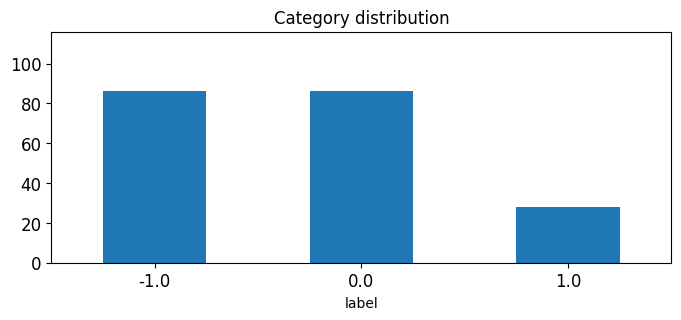

In [18]:
print(X_sample.label.value_counts())

# plot barchart for X_sample
X_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(X_sample.label.value_counts()) + 30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

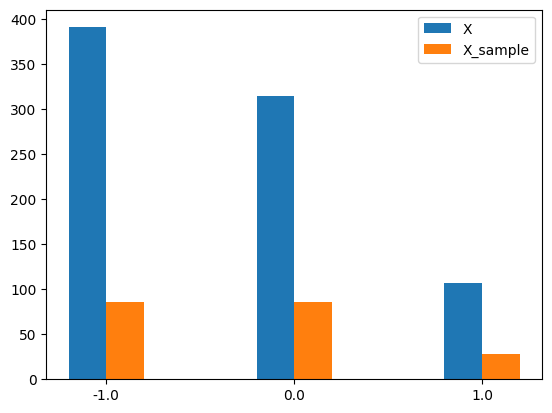

In [21]:
import matplotlib.pyplot as plt
# Answer here
x = np.arange(3)
cols = X.label.unique()

plt.bar(x - 0.1, X.label.value_counts(), 0.2)
plt.bar(x + 0.1, X_sample.label.value_counts(), 0.2)

plt.xticks(x, cols)
plt.legend(['X', 'X_sample'])


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [ ]:
X_counts # 813 by 4313

<813x4313 sparse matrix of type '<class 'numpy.int64'>'
	with 16659 stored elements in Compressed Sparse Row format>

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [26]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
print(X.text[0])

analyze = count_vect.build_analyzer()
analyze(X.text[0])

Calls on retards


['calls', 'on', 'retards']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [29]:
# Answer here
for idx, i in enumerate(X_counts[0:5, 0:100].toarray()[-1]):
    if i == 1:
        print(count_vect.get_feature_names_out()[idx])
    else:
        print('none of the first 100 tokens were found')


# first 5 documents do not contain any of the first 100 tokens


none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found
none of the first 100 tokens were found


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

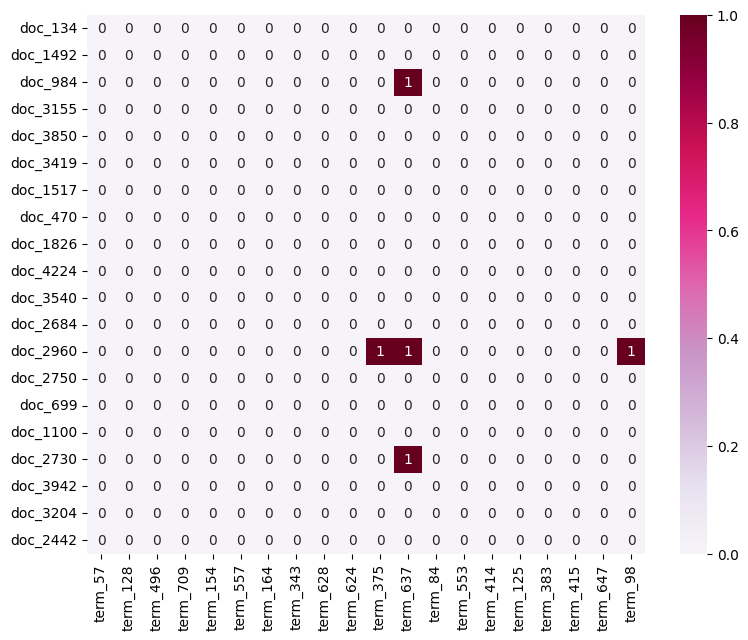

In [30]:
# Answer here

import seaborn as sns

doc_idx = np.random.choice(X_counts.shape[0], 20, replace=False)
term_idx = np.random.choice(X_counts.shape[1], 20, replace=False)

plot_x = ["term_"+str(i) for i in doc_idx]

plot_y = ["doc_"+ str(i) for i in term_idx]

plot_z = X_counts[doc_idx, :][:, term_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [33]:
# Answer here
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis = 0))[0]

fig = px.bar(pd.DataFrame({"term": count_vect.get_feature_names_out()[:300], "frequency": term_frequencies[:300]}), 
             x="term", 
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, 
                  width=1200, height=600)

fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [36]:
# Answer here

# we can reduce number of terms by removing frequently appearing tokens that are not as important, which are the stop words.

# new count vectorizer excluding stop words
vectorizer_new = CountVectorizer(stop_words='english')
X_counts_new = vectorizer_new.fit_transform(X.text)
term_frequencies_new = np.asarray(X_counts_new.sum(axis=0))[0]

fig = px.bar(pd.DataFrame({"term": count_vect.get_feature_names_out()[:100], "frequency": term_frequencies[:100]}), 
             x="term", 
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, 
                  width=1200, height=600)

fig.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [37]:
# Answer here
# using the new countvectorizer, we plot the top 300 most frequent tokens

# get indexes and freq for each token and sort them
term_frequencies_idx = [(idx, freq) for idx, freq in enumerate(term_frequencies_new)]
term_frequencies_idx_sorted = sorted(term_frequencies_idx, key=lambda x: x[1], reverse=True)

# get the top 100 most frequently used tokens
feature_names_filtered = [idx for idx, freq in term_frequencies_idx_sorted][:300]
term_frequencies_sorted = [freq for idx, freq in term_frequencies_idx_sorted][:300]

fig = px.bar(pd.DataFrame({"term": vectorizer_new.get_feature_names_out()[feature_names_filtered], "frequency": term_frequencies_sorted}), 
             x="term", 
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, 
                  width=1200, height=600)

fig.show()

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [39]:
# Answer here

# logged term frequencies
term_frequencies_new_log = [math.log(i) for i in term_frequencies_new]

# get indexes and freq for each token and sort them
term_frequencies_idx = [(idx, freq) for idx, freq in enumerate(term_frequencies_new_log)]
term_frequencies_idx_sorted = sorted(term_frequencies_idx, key=lambda x: x[1], reverse=True)

# get the top 100 most frequently used tokens
feature_names_filtered = [idx for idx, freq in term_frequencies_idx_sorted][:300]
term_frequencies_sorted = [freq for idx, freq in term_frequencies_idx_sorted][:300]

fig = px.bar(pd.DataFrame({"term": vectorizer_new.get_feature_names_out()[feature_names_filtered], "frequency": term_frequencies_sorted}), 
             x="term", 
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, 
                  width=1200, height=600)

fig.show()

# new plot appears to have be less skewed as compared to the original plot, this is due to the log transformation making less frequent tokens more visible.

# Phase 2

In [10]:
### Begin Assignment Here